In [1]:
# Importing the necessary libraries
import requests
import numpy as np
from PIL import Image
import cv2
import pytesseract
from pytesseract import Output
import re

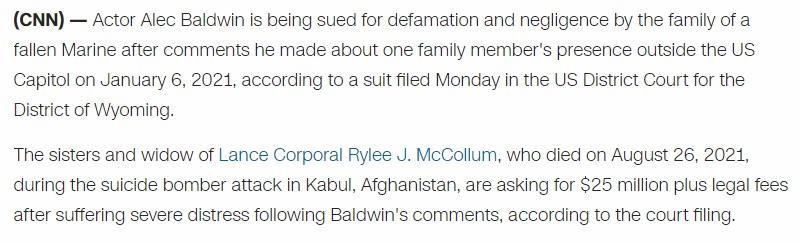

In [2]:
# Displaying a sample text image
# img = Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png', stream=True).raw)
img = Image.open(r'D:\My Work\Text Extractor\text images\cnn-article.jpg')
img

In [3]:
img.size

(799, 242)

We will now extract text from the above image using pytesseract's <b>image_to_string</b> function

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'D:/Programs on D Drive/Tesseract-OCR/tesseract.exe'

In [5]:
text = pytesseract.image_to_string(img, lang='eng',config='--psm 6')
print(text)

(CNN) — Actor Alec Baldwin is being sued for defamation and negligence by the family of a
fallen Marine after comments he made about one family member's presence outside the US
Capitol on January 6, 2021, according to a suit filed Monday in the US District Court for the
District of Wyoming.

The sisters and widow of Lance Corporal Rylee J. McCollum, who died on August 26, 2021,
during the suicide bomber attack in Kabul, Afghanistan, are asking for $25 million plus legal fees
after suffering severe distress following Baldwin's comments, according to the court filing.



From the above output we confirm that the text has been extracted successfully

In [6]:
# Implementing exception handling for removing irrelevant symbols from the text
try:
    text = pytesseract.image_to_string(img, lang='eng')
    char_to_remove = "!()@-*>+,'|#$%^&_~"
    new_string = text
    for character in char_to_remove:
        new_string = new_string.replace('character',"")
    print(new_string)
except IOError as e:
    print("Error (%s)." % e)

(CNN) — Actor Alec Baldwin is being sued for defamation and negligence by the family of a
fallen Marine after comments he made about one family member's presence outside the US
Capitol on January 6, 2021, according to a suit filed Monday in the US District Court for the
District of Wyoming.

The sisters and widow of Lance Corporal Rylee J. McCollum, who died on August 26, 2021,
during the suicide bomber attack in Kabul, Afghanistan, are asking for $25 million plus legal fees
after suffering severe distress following Baldwin's comments, according to the court filing.



We will now read the image as a grayscale by using OpenCV to further process the image

In [7]:
# Reading the image with OpenCV
image = cv2.imread(r'D:\My Work\Text Extractor\text images\cnn-article.jpg')

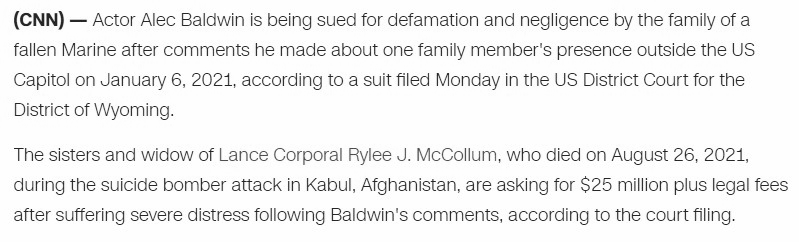

In [8]:
# Converting the image into grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Image.fromarray(image_gray)

We will now add blur to the image for removing the noise using OpenCV's <b>medianBlur</b> method

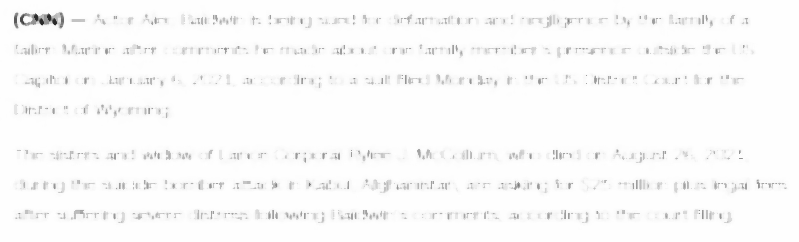

In [12]:
def noise_removal (img):
    return cv2.medianBlur(img,5)
noise = noise_removal(image_gray)
Image.fromarray(noise)

We will now perform thresholding by using OpenCV's <b>cv2.threshold</b> function

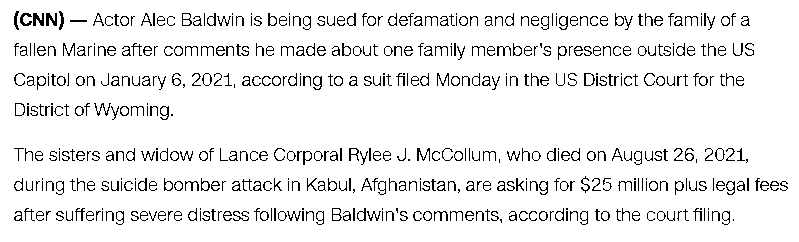

In [11]:
def threshold(img):
    return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = threshold(image_gray)
Image.fromarray(thresh)

Let us now perform eropde transformation. OpenCV's <b>cv2.erode</b> function is used to perform erosion on an image.

In [13]:
# Making a copy of grayscale image
img_copy = image_gray.copy()

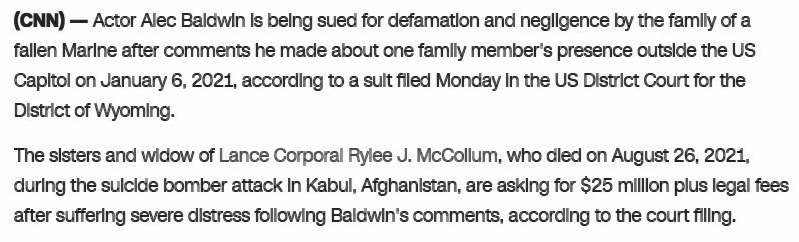

In [14]:
kernel = np.ones((2,2), np.uint8)
erode = cv2.erode(img_copy, kernel, iterations = 1)
Image.fromarray(erode)